Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) 
# 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation


# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) 
# This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [ ]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

start_time1 = time.time()
df_pandas = pd.DataFrame(np.random.randint(1, 100, size=1000000), columns=['RandomData'])
end_time1= time.time()
time1 = end_time1 - start_time1
print(f"Pandas time taken: {time1:.6f} seconds")


start_time2 = time.time()
data_numpy = np.random.randint(1, 100, size=1000000)
end_time2 = time.time()
time2 = end_time2 - start_time2
print(f"NumPy time taken: {time2:.6f} seconds")

if time1 < time2:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [ ]:
import pandas as pd
import numpy as np
import time

start_pandas = time.time()
data_pd = pd.read_csv('sleep_health.csv')

data_pd['Gender'] = data_pd['Gender'].map({'Male': 0, 'Female': 1})
data_pd['Age'] = data_pd['Age'].astype(int)


columns_of_interest = ['Sleep Duration', 'Systolic blood pressure', 'Diastolic blood pressure', 
                        'Heart Rate', 'Daily Steps', 'Age', 'Gender']

numeric_data = data_pd[columns_of_interest]

mean_values_pd = numeric_data.mean()
std_dev_pd = numeric_data['Sleep Duration'].std()

print("Pandas Mean:\n", mean_values_pd)
print("Pandas Standard Deviation:", std_dev_pd)

correlation_pd = numeric_data.corr()
sleep_age_corr_pd = numeric_data[['Sleep Duration', 'Age']].corr().iloc[0, 1]
sleep_hr_corr_pd = numeric_data[['Sleep Duration', 'Heart Rate']].corr().iloc[0, 1]
sleep_steps_corr_pd = numeric_data[['Sleep Duration', 'Daily Steps']].corr().iloc[0, 1]

print("Pandas Correlation Matrix:\n", correlation_pd)
print("Pandas Sleep Duration & Age Correlation:", sleep_age_corr_pd)
print("Pandas Sleep Duration & Heart Rate Correlation:", sleep_hr_corr_pd)
print("Pandas Sleep Duration & Daily Steps Correlation:", sleep_steps_corr_pd)

end_pandas = time.time()

#########################################################################################

start_numpy = time.time()

# Loading the CSV file as an array in NumPy
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)

age = data['Age'].astype(int)
sleep_duration = data['Sleep Duration'].astype(float)
systolic_bp = data['Systolic blood pressure'].astype(int)
diastolic_bp = data['Diastolic blood pressure'].astype(int)
heart_rate = data['Heart Rate'].astype(int)
daily_steps = data['Daily Steps'].astype(int)

mean_sleep_duration = np.mean(sleep_duration)
mean_systolic_bp = np.mean(systolic_bp)
mean_diastolic_bp = np.mean(diastolic_bp)
mean_heart_rate = np.mean(heart_rate)
mean_daily_steps = np.mean(daily_steps)

print("NumPy Mean:")
print("Sleep Duration:", mean_sleep_duration)
print("Systolic Blood Pressure:", mean_systolic_bp)
print("Diastolic Blood Pressure:", mean_diastolic_bp)
print("Heart Rate:", mean_heart_rate)
print("Daily Steps:", mean_daily_steps)


std_sleep_duration_np = np.std(sleep_duration)

print("NumPy Standard Deviation of Sleep Duration:", std_sleep_duration_np)


sleep_age_corr_np = np.corrcoef(sleep_duration, age)[0, 1]
sleep_hr_corr_np = np.corrcoef(sleep_duration, heart_rate)[0, 1]
sleep_steps_corr_np = np.corrcoef(sleep_duration, daily_steps)[0, 1]

print("NumPy Sleep Duration & Age Correlation:", sleep_age_corr_np)
print("NumPy Sleep Duration & Heart Rate Correlation:", sleep_hr_corr_np)
print("NumPy Sleep Duration & Daily Steps Correlation:", sleep_steps_corr_np)


end_numpy = time.time()

pandas_time = end_pandas - start_pandas
numpy_time = end_numpy - start_numpy

print("Pandas Time:", pandas_time)
print("NumPy Time:", numpy_time)

if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

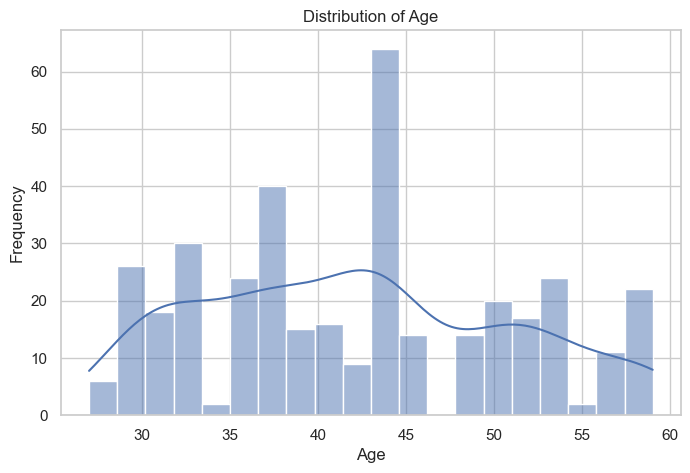

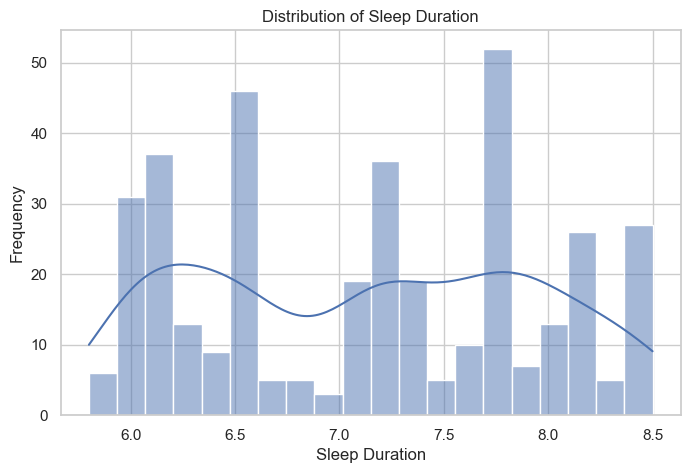

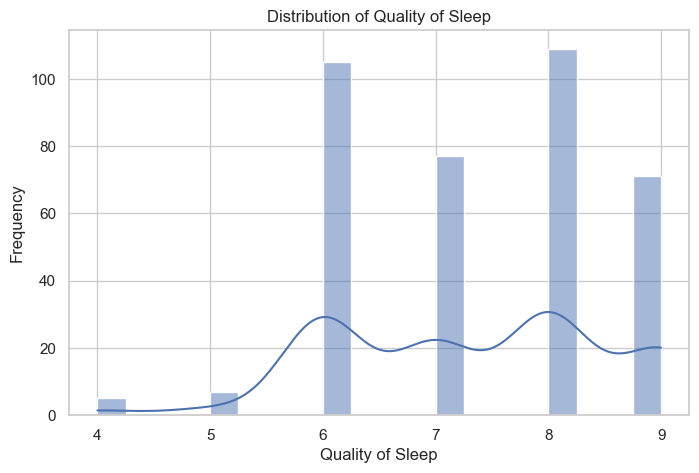

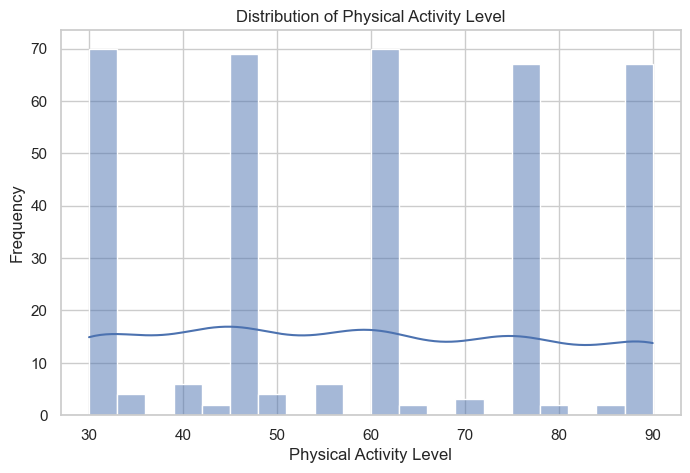

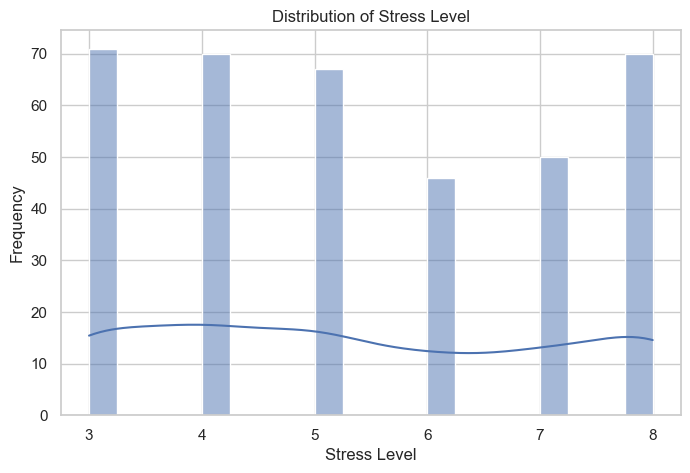

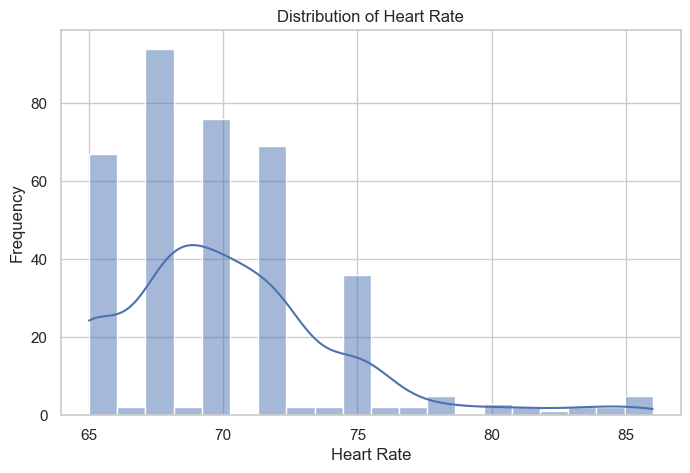

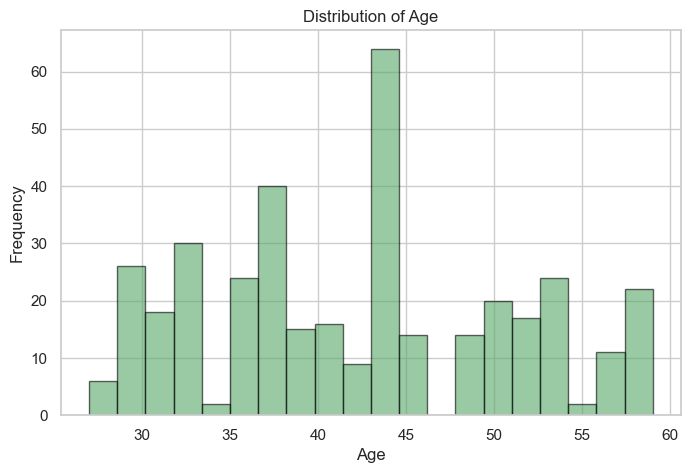

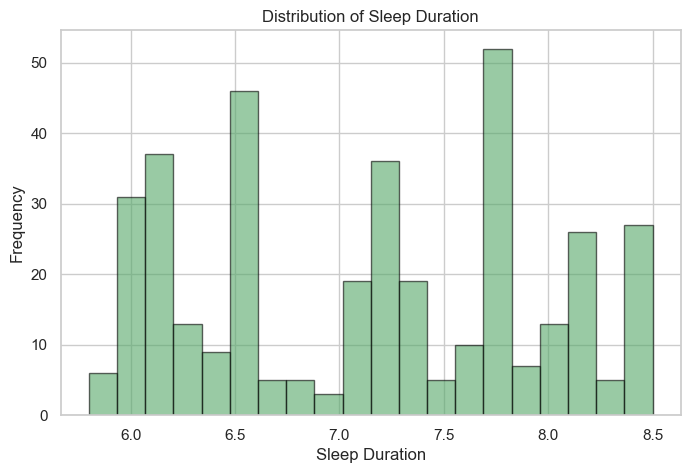

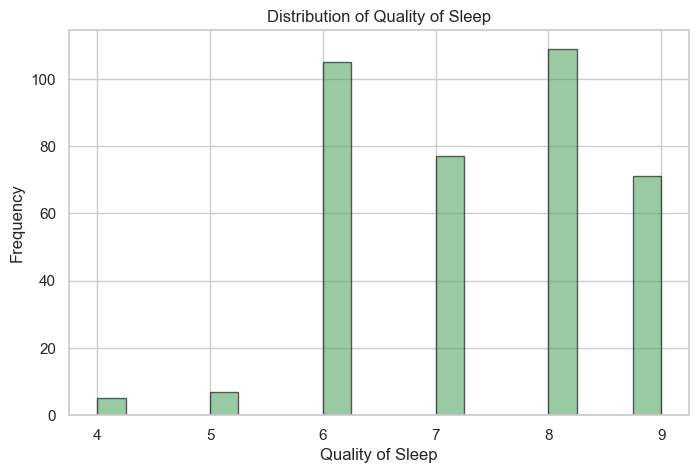

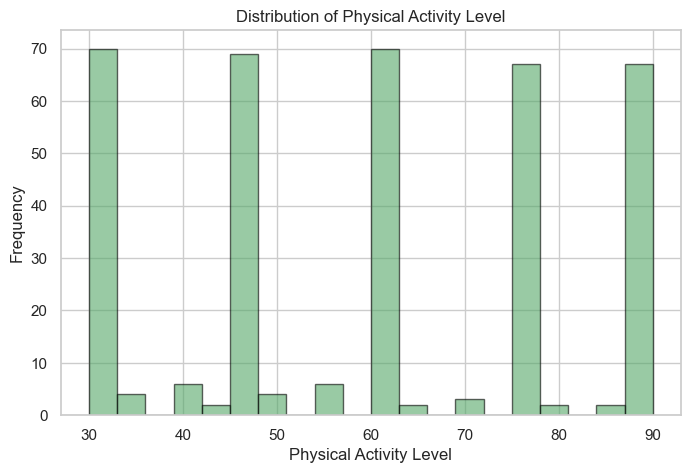

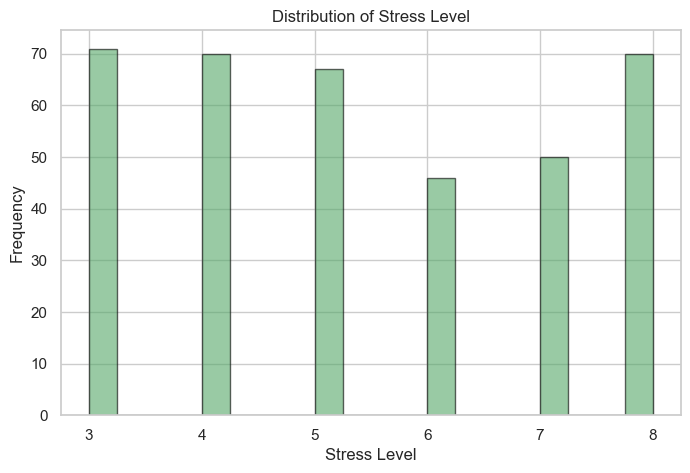

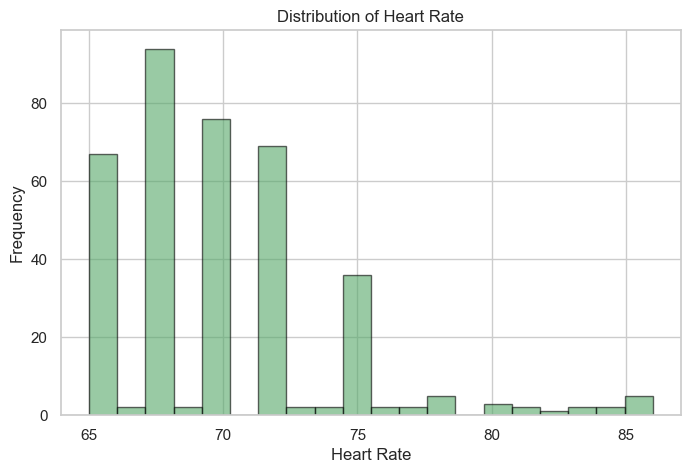

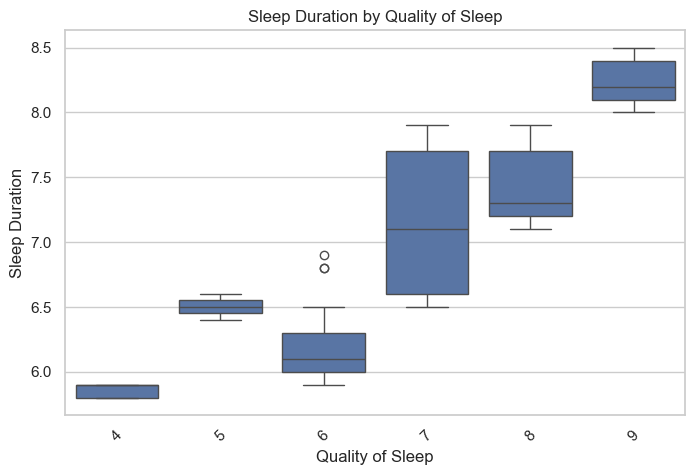

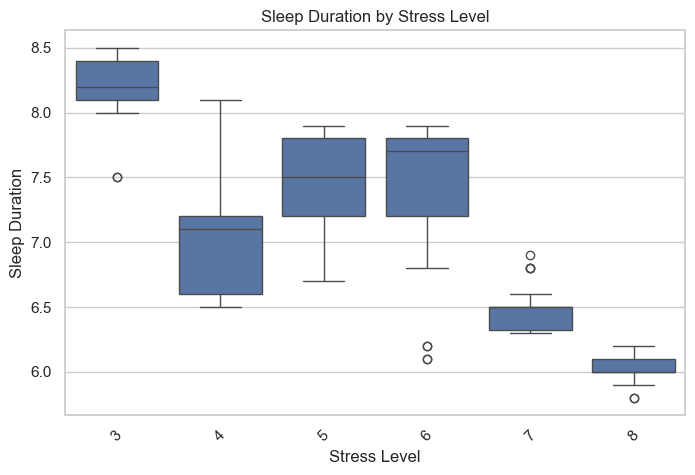

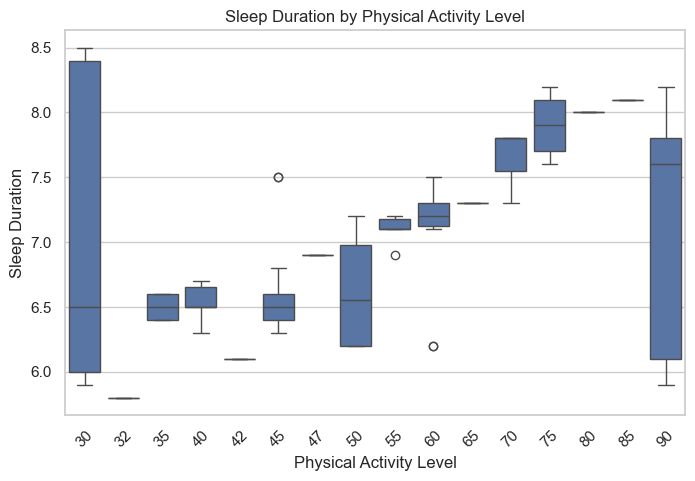

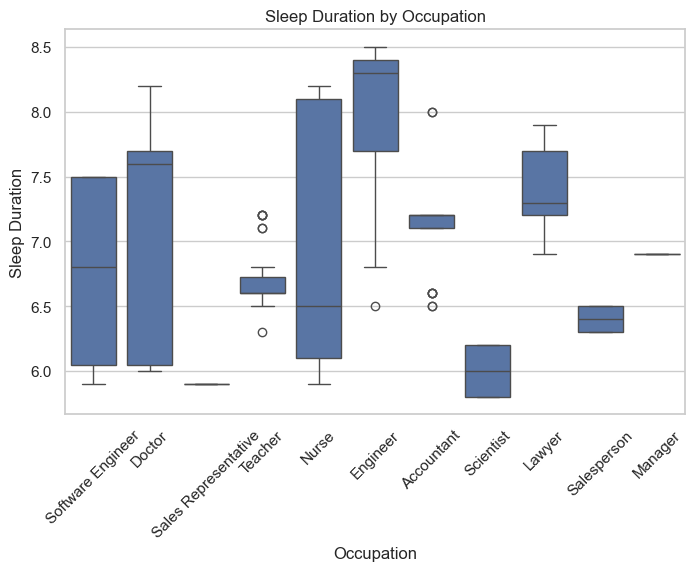

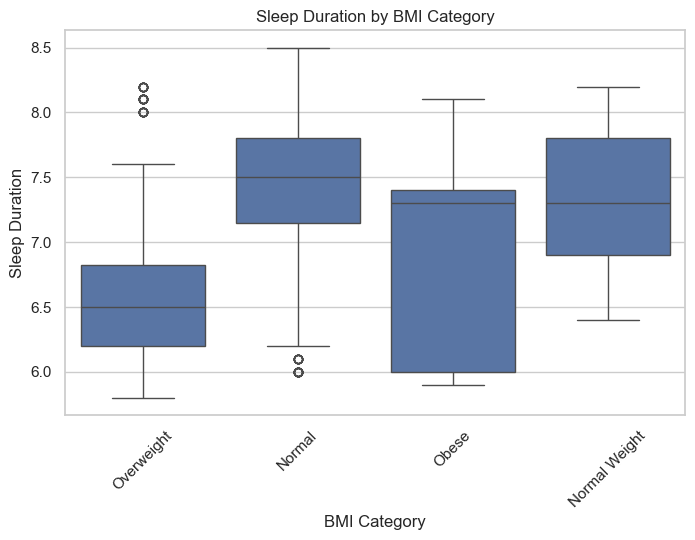

C:\Users\姜洲\AppData\Local\Temp\ipykernel_43436\3784071861.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=unique_categories)


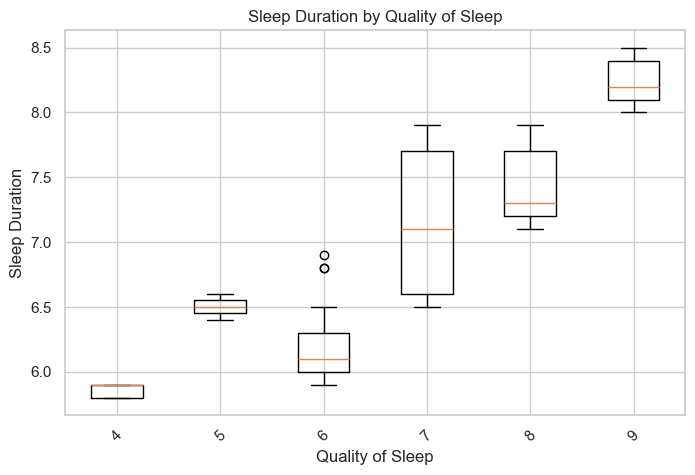

C:\Users\姜洲\AppData\Local\Temp\ipykernel_43436\3784071861.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=unique_categories)


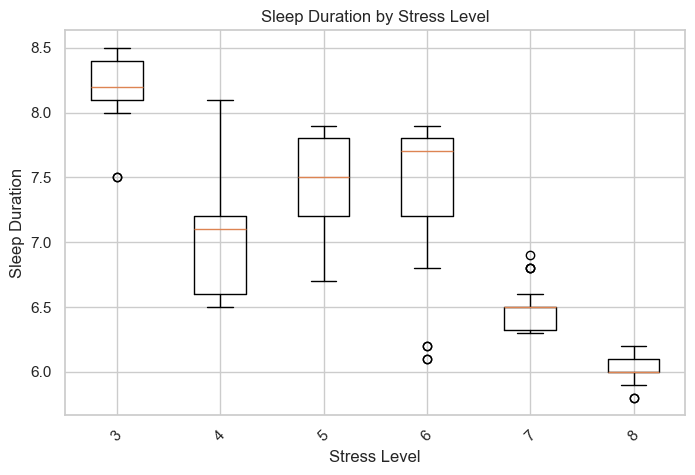

C:\Users\姜洲\AppData\Local\Temp\ipykernel_43436\3784071861.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=unique_categories)


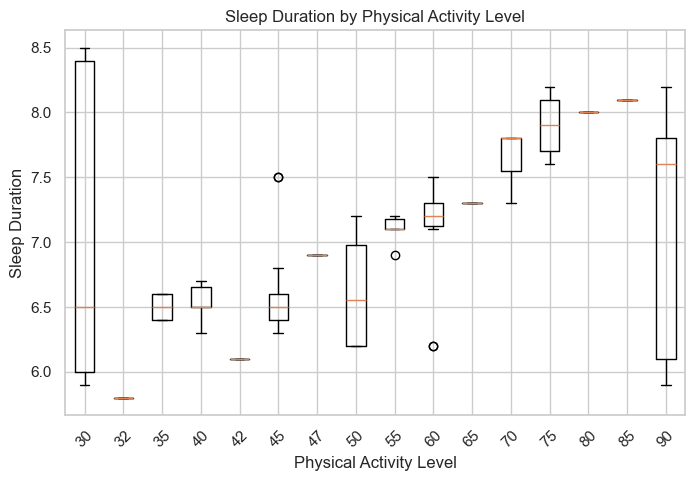

C:\Users\姜洲\AppData\Local\Temp\ipykernel_43436\3784071861.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=unique_categories)


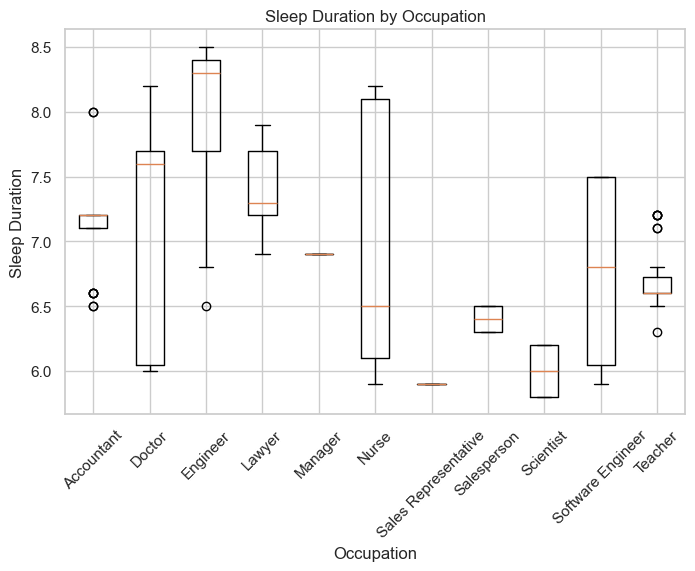

C:\Users\姜洲\AppData\Local\Temp\ipykernel_43436\3784071861.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=unique_categories)


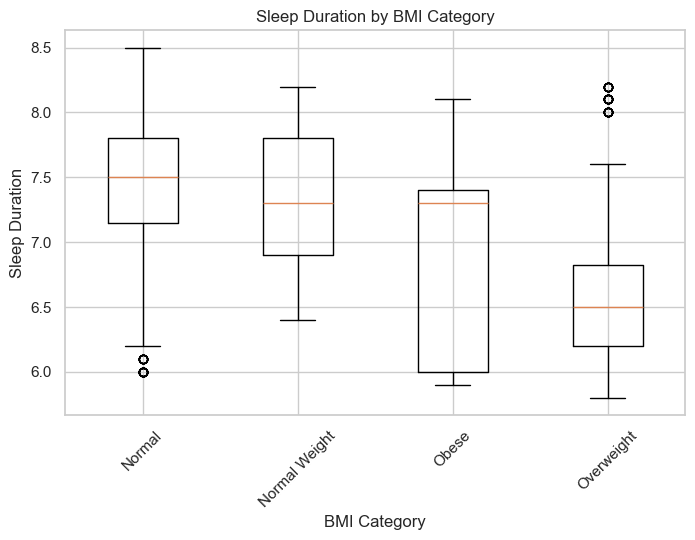

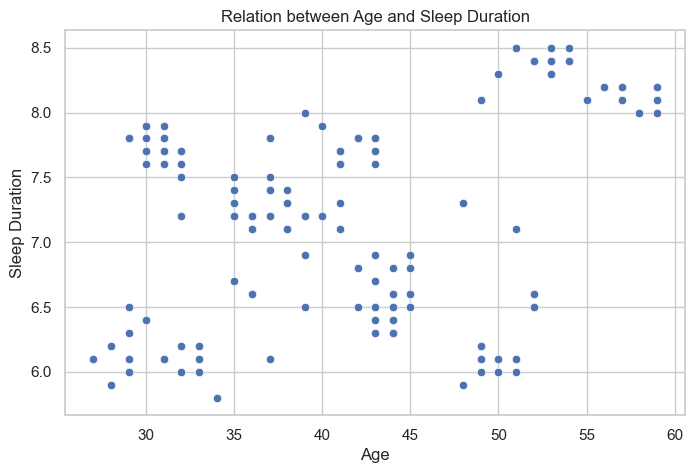

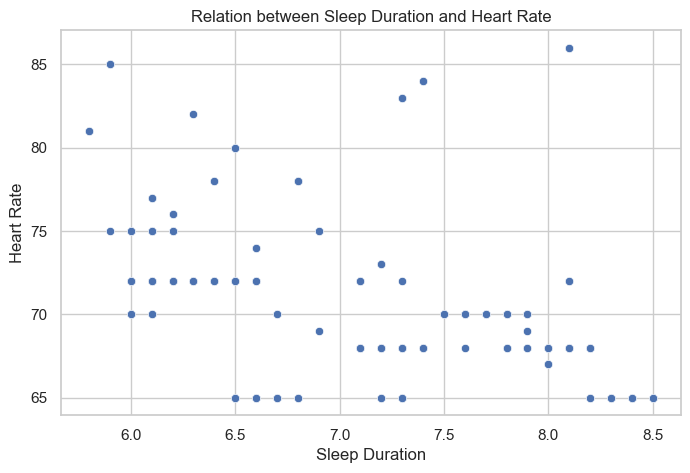

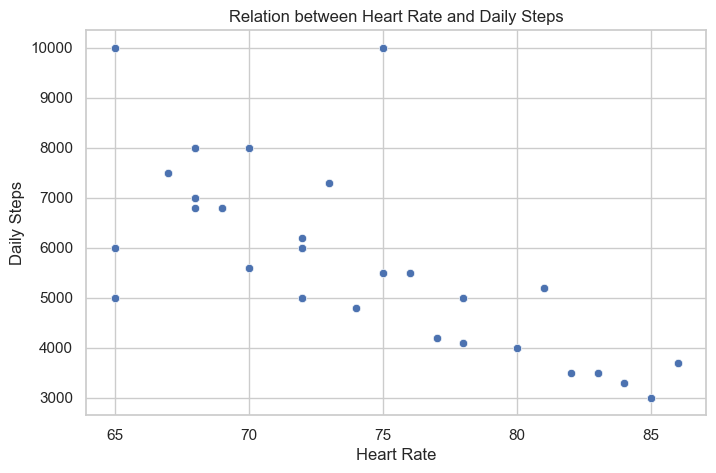

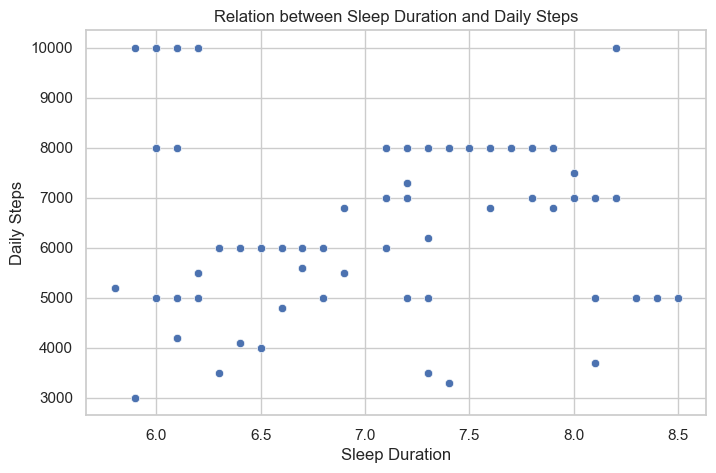

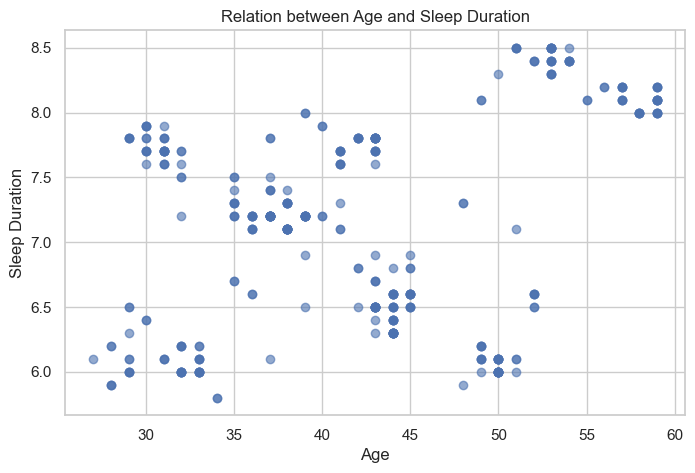

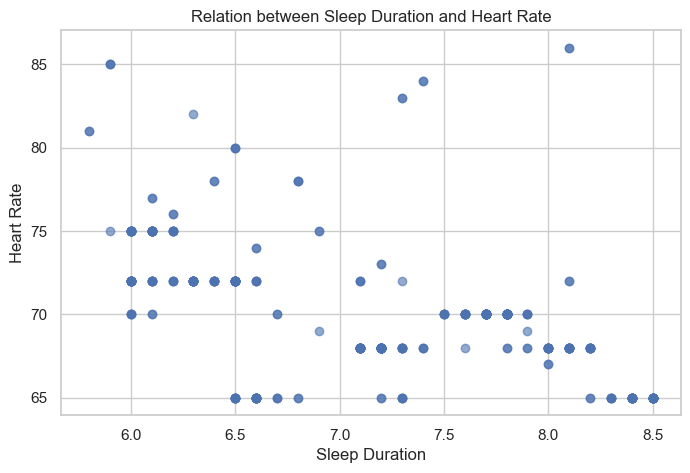

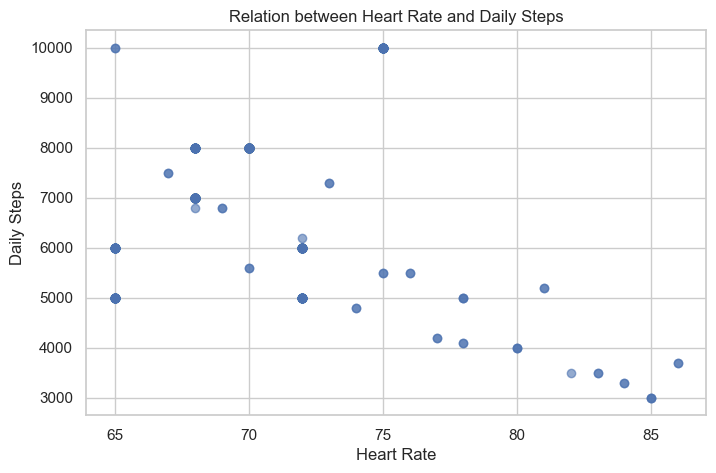

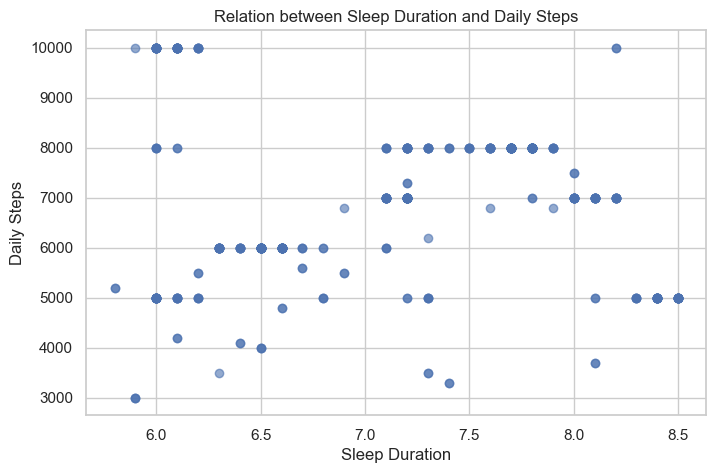

Pandas Time: 0.9871058464050293
NumPy Time: 0.794313907623291
NumPy is faster.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


data_pd = pd.read_csv('sleep_health.csv')


sns.set(style="whitegrid")


features = ['Age', 'Sleep Duration', 'Quality of Sleep', 
            'Physical Activity Level', 'Stress Level', 'Heart Rate']

start_pandas = time.time()


for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_pd[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

end_pandas = time.time()

start_numpy = time.time()

for feature in features:
    plt.figure(figsize=(8, 5))
    plt.hist(data_pd[feature], bins=20, alpha=0.6, color='g', edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

end_numpy = time.time()


group_features = ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 
                  'Occupation', 'BMI Category']

for group_feature in group_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data_pd[group_feature], y=data_pd['Sleep Duration'])
    plt.title(f'Sleep Duration by {group_feature}')
    plt.xlabel(group_feature)
    plt.ylabel('Sleep Duration')
    plt.xticks(rotation=45)
    plt.show()


for group_feature in group_features:
    plt.figure(figsize=(8, 5))
    unique_categories = np.unique(data_pd[group_feature])
    data_to_plot = [data_pd['Sleep Duration'][data_pd[group_feature] == category] for category in unique_categories]

    plt.boxplot(data_to_plot, labels=unique_categories)
    plt.title(f'Sleep Duration by {group_feature}')
    plt.xlabel(group_feature)
    plt.ylabel('Sleep Duration')
    plt.xticks(rotation=45)
    plt.show()


relation_features = [('Age', 'Sleep Duration'), ('Sleep Duration', 'Heart Rate'),
                    ('Heart Rate', 'Daily Steps'), ('Sleep Duration', 'Daily Steps')]

for x_feature, y_feature in relation_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data_pd, x=x_feature, y=y_feature)
    plt.title(f'Relation between {x_feature} and {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()


for x_feature, y_feature in relation_features:
    plt.figure(figsize=(8, 5))
    plt.scatter(data_pd[x_feature], data_pd[y_feature], alpha=0.6)
    plt.title(f'Relation between {x_feature} and {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()


pandas_time = end_pandas - start_pandas
numpy_time = end_numpy - start_numpy

print("Pandas Time:", pandas_time)
print("NumPy Time:", numpy_time)

if pandas_time < numpy_time:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy

